# Análisis del viroma arqueal

---

> Los virus que infectan arqueas, conocidos colectivamente como viroma arqueal, representan una de las ramas menos exploradas de la virosfera. 
> Durante décadas, el estudio de estos virus se ha centrado en ambientes extremos como fuentes hidrotermales, salares o ambientes anaerobios, donde se ha 
> observado una enorme diversidad morfológica, genómica y evolutiva. Sin embargo, el conocimiento sobre el viroma arqueal sigue fragmentado y disperso, 
> limitado por desafíos técnicos en su aislamiento, escasa representación en bases de datos virales y una nomenclatura taxonómica aún en desarrollo

---
## Objetivo:

---

Este proyecto tiene como objetivo realizar una recopilación sistemática y un análisis bibliométrico de la literatura científica relacionada con el viroma arqueal, haciendo énfasis en los tipos virales descritos, sus mecanismos de infección, estructuras genómicas y relaciones evolutivas con otros virus y hospedadores.


### Claves (Variables) de Pubmed

| Clave | Descripción |
| ------------ | ------------ |
| PMID | PubMed ID único del artículo |
| TI | Título del artículo |
| AB | Abstract (resumen) |
| AU | Autores (lista) |
| DFAU | Autores con nombre completo |
| AD | Dirección de los autores (afiliaciones) |
| DP | Fecha de publicación (año o año/mes/día) |
| TA | Título abreviado de la revista |
| JT | Nombre completo de la revista |
| PL | País de publicación |
| MH | Términos MeSH (Medical Subject Headings) |
| PT | Tipo de publicación |
| VI | Volumen de la revista |
| IP | Número (issue) de la revista |
| PG | Páginas |
| LID | DOI o identificador del artículo |
| EDAT | Fecha de entrada en PubMed |
| PHST | Fechas importantes (recibido, aceptado, publicado online) |
| LANG | Idioma |
| SO | Fuente completa (revista + año + volumen + páginas) |


In [52]:
from Bio import Medline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import os

main_directory = os.getenv("VIRUS_DIR_PATH")
output_file = os.path.join(main_directory, "pubmed_out.txt")

#--> Leer el archivo .txt en formato MEDLINE -->

with open(output_file, 'r', encoding="utf-8") as handle:
    records = Medline.parse(handle)
    records = list(records)
print(len(records))
print(records[0].keys())




515
dict_keys(['PMID', 'OWN', 'STAT', 'LR', 'IS', 'DP', 'TI', 'PG', 'LID', 'AB', 'FAU', 'AU', 'AUID', 'AD', 'LA', 'PT', 'DEP', 'PL', 'TA', 'JT', 'JID', 'SB', 'OTO', 'OT', 'EDAT', 'MHDA', 'CRDT', 'PHST', 'AID', 'PST', 'SO'])


In [32]:
viral_df = pd.DataFrame(records)
viral_df = viral_df[["PMID", "OWN", "TI", "AU", "AD", "DP", "LA", "PT", "JT", "AB", "EDAT"]]


print(viral_df.head(5))


       PMID  OWN                                                 TI  \
0  40981431  NLM  The infection cycle of the haloarchaeal virus ...   
1  40749557  NLM  Unravelling DNA viral communities involved in ...   
2  40721520  NLM                          Hunting archaeal viruses.   
3  40711890  NLM  Summary of taxonomy changes ratified by the In...   
4  40680112  NLM  Insights into the spool-like architecture and ...   

                                                  AU  \
0  [Schwarzer S, Backer LE, Nijland JG, Hayani Aj...   
1            [Zhu K, Shi Z, Zhang Y, Zhang S, Luo G]   
2                                         [Quax TEF]   
3  [Krupovic M, Baquero DP, Bignon EA, Bize A, Bo...   
4  [Zhang H, Wang H, Li Y, Fan Y, Zhang Z, Chen H...   

                                                  AD           DP     LA  \
0  [Department of Molecular Microbiology, Groning...  2025 Sep 22  [eng]   
1  [Shanghai Key Laboratory of Atmospheric Partic...     2025 Sep  [eng]   
2  [Gron

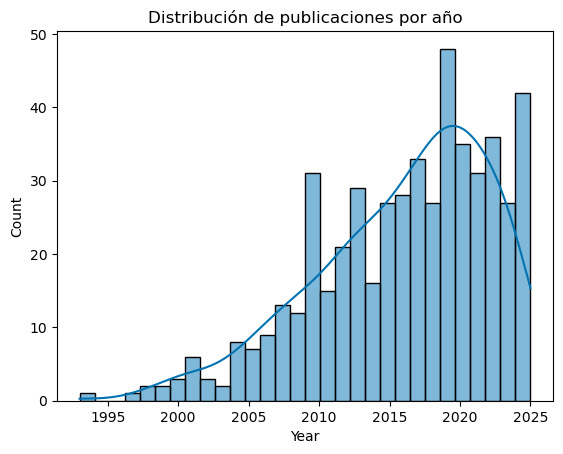

In [33]:
viral_df["Year"] = viral_df["DP"].str.extract(r"(\d{4})").astype(float)

# Graficar histograma

sns.histplot(data=viral_df, x="Year", bins=30, kde=True)
plt.title("Distribución de publicaciones por año")
plt.show()



In [54]:
viral_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PMID    515 non-null    object 
 1   OWN     515 non-null    object 
 2   TI      515 non-null    object 
 3   AU      515 non-null    object 
 4   AD      512 non-null    object 
 5   DP      515 non-null    object 
 6   LA      515 non-null    object 
 7   PT      515 non-null    object 
 8   JT      515 non-null    object 
 9   AB      503 non-null    object 
 10  EDAT    515 non-null    object 
 11  Year    515 non-null    float64
dtypes: float64(1), object(11)
memory usage: 48.4+ KB


In [ ]:
authors_count = viral_df["AU"].value_counts()


<class 'pandas.core.series.Series'>
